Nama:

In [1]:
print("Rahman Aziz Firmansyah")

Rahman Aziz Firmansyah


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


(1) Lanjutkan hasil transformasi train set dan test set dari hands-on 6

In [3]:
X_train_transformed = pd.read_csv('X_train_transformed.csv').drop(['Unnamed: 0', 'Applicant_ID'], axis=1)
X_test_transformed = pd.read_csv('X_test_transformed.csv').drop(['Unnamed: 0', 'Applicant_ID'], axis=1)
y_train = pd.read_csv('y_train.csv').loc[:, 'Status']
y_test = pd.read_csv('y_test.csv').loc[:, 'Status']

(2) Buat 2 model: SVM dengan kernel='poly' default dan optimized. Lakukan cross-validation dengan estimator SVM poly dengan untuk menentukan nilai optimal untuk hyperparameter C, degree dan coef0. Print classification report untuk trainset dan testset (default vs optimized). Apakah optimisasi meningkatkan performansi dari model?

In [4]:
#SVM dengan hyperparameter default
svm_def = SVC(kernel='poly')
svm_def.fit(X_train_transformed, y_train)

SVC(kernel='poly')

In [5]:
#fungsi untuk menampilkan classification report
import classification

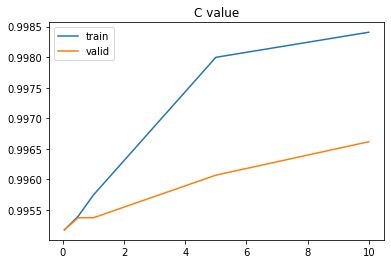

10

In [6]:
#optimasi hyperparameter
params = [0.05, 0.5, 1, 5, 10]
train = []
valid = []

for par in params:
    svm_opt = SVC(random_state=42, kernel='poly', C=par)
    result = cross_validate(svm_opt, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('C value')
plt.show()
C_fin = params[np.argmax(valid)]
C_fin

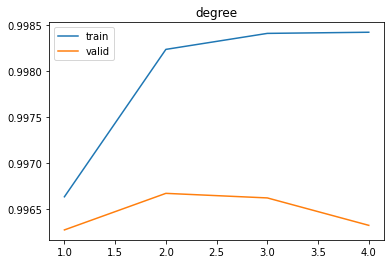

2

In [7]:
params = [1, 2, 3, 4]
train = []
valid = []

for par in params:
    svm_opt = SVC(random_state=42, kernel='poly', C=C_fin, degree=par)
    result = cross_validate(svm_opt, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('degree')
plt.show()
d_fin = params[np.argmax(valid)]
d_fin

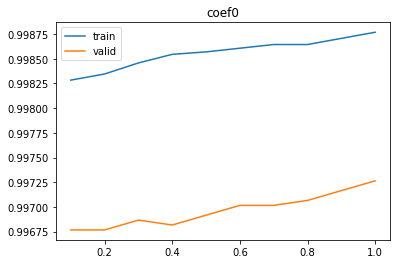

1.0

In [8]:
params = np.arange(0.1, 1.1, 0.1)
train = []
valid = []

for par in params:
    svm_opt = SVC(random_state=42, kernel='poly', C=C_fin, degree=d_fin, coef0=par)
    result = cross_validate(svm_opt, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('coef0')
plt.show()
coef_fin = params[np.argmax(valid)]
coef_fin

In [9]:
#model svm yang telah dioptimasi
svm_final = SVC(kernel='poly', C=C_fin, degree=d_fin, coef0=coef_fin)
svm_final.fit(X_train_transformed, y_train)

SVC(C=10, coef0=1.0, degree=2, kernel='poly')

In [10]:
#classification report untuk model tanpa optimasi
classification.classif(X_train_transformed, y_train, svm_def)
classification.classif(X_test_transformed, y_test, svm_def)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20005
           0       1.00      0.11      0.20        97

    accuracy                           1.00     20102
   macro avg       1.00      0.56      0.60     20102
weighted avg       1.00      1.00      0.99     20102

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5002
           0       1.00      0.08      0.15        24

    accuracy                           1.00      5026
   macro avg       1.00      0.54      0.58      5026
weighted avg       1.00      1.00      0.99      5026



In [11]:
#classification report untuk model svm poly dengan optimasi
classification.classif(X_train_transformed, y_train, svm_final)
classification.classif(X_test_transformed, y_test, svm_final)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20005
           0       0.99      0.73      0.84        97

    accuracy                           1.00     20102
   macro avg       0.99      0.87      0.92     20102
weighted avg       1.00      1.00      1.00     20102

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5002
           0       1.00      0.58      0.74        24

    accuracy                           1.00      5026
   macro avg       1.00      0.79      0.87      5026
weighted avg       1.00      1.00      1.00      5026



Berdasarkan nilai precision dan recall dari kedua model, optimasi berhasil meningkatkan performa model meskipun terjadi overfit

(3) Buat 2 model: SVM dengan kernel='rbf' default dan optimized. Lakukan cross-validation dengan estimator SVM rbf dengan untuk menentukan nilai optimal untuk hyperparameter gamma dan C. Print classification report untuk trainset dan testset (default vs optimized). Apakah optimisasi meningkatkan performansi dari model?

In [12]:
svm_rbf_def = SVC(kernel='rbf')
svm_rbf_def.fit(X_train_transformed, y_train)

SVC()

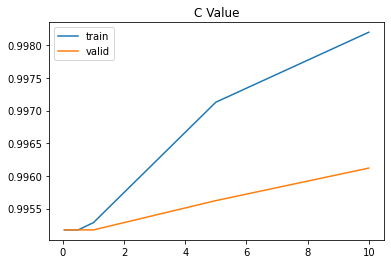

10

In [13]:
#optimasi parameter SVM kernel rbf
params = [0.05, 0.5, 1, 5, 10]
train = []
valid = []

for par in params:
    svm1 = SVC(random_state=42, kernel='rbf', C=par)
    result = cross_validate(svm1, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('C Value')
plt.show()
c_rbf_fin = params[np.argmax(valid)]
c_rbf_fin

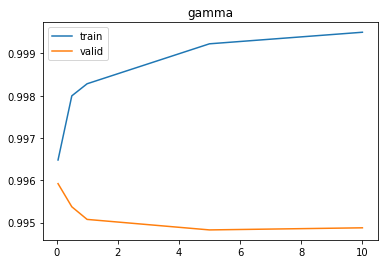

0.05

In [14]:
params = [0.05, 0.5, 1, 5, 10]
train = []
valid = []

for par in params:
    svm1 = SVC(random_state=42, kernel='rbf', C=c_rbf_fin, gamma = par)
    result = cross_validate(svm1, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('gamma')
plt.show()
gamma_rbf_fin = params[np.argmax(valid)]
gamma_rbf_fin

In [15]:
svm_rbf_fin = SVC(random_state=42, kernel='rbf', C=c_rbf_fin, gamma = gamma_rbf_fin)
svm_rbf_fin.fit(X_train_transformed, y_train)

SVC(C=10, gamma=0.05, random_state=42)

In [16]:
#classification report untuk model tanpa optimasi
classification.classif(X_train_transformed, y_train, svm_rbf_def)
classification.classif(X_test_transformed, y_test, svm_rbf_def)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20005
           0       1.00      0.05      0.10        97

    accuracy                           1.00     20102
   macro avg       1.00      0.53      0.55     20102
weighted avg       1.00      1.00      0.99     20102

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5002
           0       1.00      0.04      0.08        24

    accuracy                           1.00      5026
   macro avg       1.00      0.52      0.54      5026
weighted avg       1.00      1.00      0.99      5026



In [17]:
#classification report untuk model dengan optimasi
classification.classif(X_train_transformed, y_train, svm_rbf_fin)
classification.classif(X_test_transformed, y_test, svm_rbf_fin)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20005
           0       1.00      0.31      0.47        97

    accuracy                           1.00     20102
   macro avg       1.00      0.65      0.74     20102
weighted avg       1.00      1.00      1.00     20102

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5002
           0       0.86      0.25      0.39        24

    accuracy                           1.00      5026
   macro avg       0.93      0.62      0.69      5026
weighted avg       1.00      1.00      1.00      5026



Optimasi hyperparameter pada model SVM rbf berhasil meningkatkan performa namun terjadi overfit

(4) Dari hasil performansi yang Anda dapatkan dengan menggunakan kedua kernel, manakah estimator yang lebih baik untuk memprediksi dataset ini? Apa alasannya?

Berdasarkan nilai precision dan recall setiap model, model SVM yang paling baik untuk memprediksi dataset ini adalah SVM dengan kernel polynomial dengan optimasi

(5) Buatlah satu dataframe yang menunjukkan performance terhadap testing set dari 5 estimator yang telah dibuat: <p>
(a) index = 5 estimator terbaik: dt terbaik, rf terbaik, ada terbaik, xg terbaik, svm terbaik yang telah anda buat <p>
(b) kolom = precision, recall, tnr, npv, f1-score, accuracy <p>
Dari 5 estimator ini manakah estimator terbaik untuk dataset credit card? Apa alasannya?

In [18]:
#menyiapkan model dt, rf, ada, xgboost
dt = DecisionTreeClassifier(max_depth=4)
rf = RandomForestClassifier(max_depth=33, max_leaf_nodes=30, min_samples_leaf=2, 
min_samples_split=16, n_estimators=7)
ada = AdaBoostClassifier(n_estimators=30)
xg = XGBClassifier()
for model in [dt, rf, ada, xg]:
    model.fit(X_train_transformed, y_train)

In [19]:
#list model dan label
models = [svm_final, dt, rf, ada, xg]
labels = ['svm', 'dtree', 'rf', 'ada', 'xg']
#classification report
classification.perf_df(X_train_transformed, y_train, X_test_transformed, y_test, model_list=models, label_list=labels)

              recall  precision       TNR       NPV  accuracy        f1
ada_test     0.99980   0.999600  0.916667  0.956522  0.999700  0.999403
ada_train    1.00000   1.000000  1.000000       1.0  1.000000  1.000000
dtree_test   0.99900   0.999200  0.833333       0.8  0.999100  0.998209
dtree_train  0.99970   0.999251  0.845361  0.931818  0.999475  0.998955
rf_test      1.00000   0.995225  0.000000      none  0.997607  0.995225
rf_train     1.00000   0.995373  0.041237       1.0  0.997681  0.995374
svm_test     1.00000   0.998005  0.583333       1.0  0.999001  0.998010
svm_train    0.99995   0.998702  0.731959  0.986111  0.999326  0.998657
xg_test      0.99980   0.999400  0.875000  0.954545  0.999600  0.999204
xg_train     1.00000   1.000000  1.000000       1.0  1.000000  1.000000


berdasarkan nilai precision, recall, TNR dan NPV setiap model, AdaBoostClassifier merupakan model terbaik untuk memprediksi data credit card application